In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#source of dataset: http://archive.ics.uci.edu/ml/datasets/Student+Performance
#target variable: G3 (performance of students in portuguese)
#change delimiter from semicolon to comma
df = pd.read_csv('student/student-por.csv', sep=";")

In [4]:
#number of rows and columns
df.shape

(649, 33)

In [5]:
#unify column names (lower letters)
df.columns = df.columns.str.lower()

In [6]:
df.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,famrel,freetime,goout,dalc,walc,health,absences,g1,g2,g3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
#get average performance of males and females
df.groupby(['sex'])['g3'].mean()

sex
F    12.253264
M    11.406015
Name: g3, dtype: float64

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
pstatus       649 non-null object
medu          649 non-null int64
fedu          649 non-null int64
mjob          649 non-null object
fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
dalc          649 no

In [8]:
#split dataet in training, validation and testong part
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


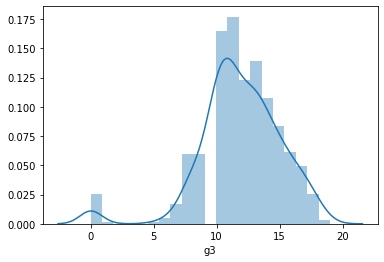

In [9]:
#check distribution of target values
#--> no logarithm required
sns.distplot(df.g3)

In [10]:
#create target variable arrays
y_train = df_train.g3.values
y_val = df_val.g3.values
y_test = df_test.g3.values

#remove target variable arrays from df's
del df_train['g3']
del df_val['g3']
del df_test['g3']

In [11]:
#define first numeric features
features = ['age', 'absences']

In [12]:
# 1st: do one hot encoding
# 2nd: get a matrix array with 'values'
def prepare_X(df):
    df = df.copy()
    for v in ['GP', 'MS']:
        #give feature useful name, e.g. 'school_GP' if the school is Gabriel Pereira
        feature = 'school_%s' % v
        #create one-hot encoding feature
        #here a new pandas series is created (school)
        #astype(int) gives a 1 for True and a 0 for False
        value = (df['school'] == v).astype(int)
        #add the feature back to the df, using the feature name
        df[feature] = value
        features.append(feature)
    
    for v in ['F', 'M']:
        feature = 'sex_%s' % v
        df[feature] = (df['sex'] == v).astype(int)
        features.append(feature)
        
    for v in ['U', 'R']:
        feature = 'address_%s' % v
        df[feature] = (df['address'] == v).astype(int)
        features.append(feature)
    
    for v in ['LE3', 'GT3']:
        feature = 'famsize_%s' % v
        df[feature] = (df['famsize'] == v).astype(int)
        features.append(feature)
    
    for v in ['T', 'A']:
        feature = 'pstatus_%s' % v
        df[feature] = (df['pstatus'] == v).astype(int)
        features.append(feature)
        
    for v in ['at_home', 'health', 'other', 'services', 'teacher']:
        feature = 'mjob_%s' % v
        df[feature] = (df['mjob'] == v).astype(int)
        features.append(feature)
    
    for v in ['teacher', 'other', 'services', 'health', 'at_home']:
        feature = 'fjob_%s' % v
        df[feature] = (df['fjob'] == v).astype(int)
        features.append(feature)
    
    for v in ['course', 'other', 'home', 'reputation']:
        feature = 'reason_%s' % v
        df[feature] = (df['reason'] == v).astype(int)
        features.append(feature)
    
    for v in ['mother', 'father', 'other']:
        feature = 'guardian_%s' % v
        df[feature] = (df['guardian'] == v).astype(int)
        features.append(feature)
    
    for v in ['yes', 'no']:
        feature = 'schoolsup_%s' % v
        df[feature] = (df['schoolsup'] == v).astype(int)
        features.append(feature)
    
    for v in ['yes', 'no']:
        feature = 'famsup_%s' % v
        df[feature] = (df['famsup'] == v).astype(int)
        features.append(feature)
    
    for v in ['yes', 'no']:
        feature = 'paid_%s' % v
        df[feature] = (df['paid'] == v).astype(int)
        features.append(feature)
        
    for v in ['yes', 'no']:
        feature = 'activities_%s' % v
        df[feature] = (df['activities'] == v).astype(int)
        features.append(feature)
    
    for v in ['yes', 'no']:
        feature = 'nursery_%s' % v
        df[feature] = (df['nursery'] == v).astype(int)
        features.append(feature)
        
    for v in ['yes', 'no']:
        feature = 'higher_%s' % v
        df[feature] = (df['higher'] == v).astype(int)
        features.append(feature)
        
    for v in ['yes', 'no']:
        feature = 'internet_%s' % v
        df[feature] = (df['internet'] == v).astype(int)
        features.append(feature)
    
    for v in ['yes', 'no']:
        feature = 'romantic_%s' % v
        df[feature] = (df['romantic'] == v).astype(int)
        features.append(feature)
    
    df_num = df[features]
    X = df_num.values
    return X


In [13]:
#get matrix array from training set
X_train = prepare_X(df_train)

In [14]:
#return the weights
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]
w_0, w = linear_regression(X_train, y_train)

#prediction of target variable, based on training set
y_pred = w_0 + X_train.dot(w)

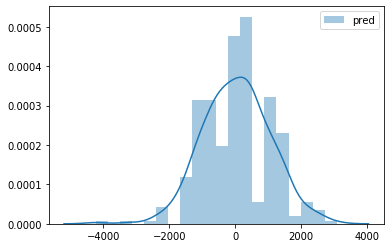

In [18]:
# --> get distribution of predicted target variable
sns.distplot(y_pred, label='pred')
#sns.distplot(y_train, label='target')
plt.legend()

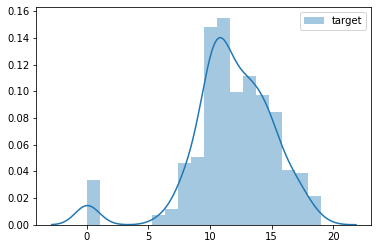

In [19]:
# --> get distribution of real target variable
#sns.distplot(y_pred, label='pred')
sns.distplot(y_train, label='target')
plt.legend()

In [21]:
#get rmse
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
rmse(y_train, y_pred)

1021.7755295252342

In [22]:
#regularize with the parameter r
def linear_regression_reg(X, y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    #add r to main diagonal of XTX
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [23]:
# the bigger r (alpha), the smaller the weights (the denominator (Nenner) becomes bigger)
# on the left 'column', you can see r, that growths with each step
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 1085321804899886080.00, 370589722003918080.00, 89116505095720416.00
0.001, 1.28, 0.56, 1.20
 0.01, 1.27, 0.56, 1.20
  0.1, 1.27, 0.56, 1.19
    1, 1.18, 0.53, 1.12
   10, 0.74, 0.41, 0.72


In [25]:
#what about our RMSE (still related to training set, not validation set)
X_train = prepare_X(df_train)
w_0, w = linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w_0 + X_train.dot(w)
rmse(y_train, y_pred)


2.8622952648055313

In [27]:
#run a grid search to identify the best value of r
#r = 0.0001 seems to be the best
X_train = prepare_X(df_train)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    print('%6s' %r, rmse(y_train, y_pred))

 1e-06 2.862295264737121
0.0001 2.8622952647215545
 0.001 2.86229526475255
  0.01 2.86229526786053
   0.1 2.862295577572243
     1 2.8623254913057257
     5 2.8629493149900185
    10 2.864517254518028


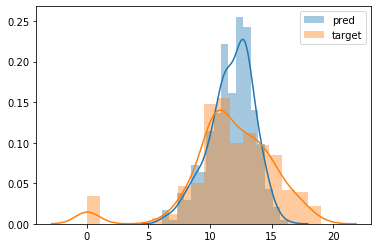

In [28]:
# --> get distribution of real and predicted target variable
#after regularization
sns.distplot(y_pred, label='pred')
sns.distplot(y_train, label='target')
plt.legend()